In [1]:
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt
import mlrose_hiive
import seaborn as sns
import ro_ml_util as utl
import os
import pickle
import glob

utl.check_folder("NeuralNetwork/")
plt.style.use("ggplot")
folder = "NeuralNetwork/Gradient_Descent/"
utl.check_folder(folder)

SEED=42

n_iterations = np.arange(1, 201, 1)
prob_size = "XL"
verbose = True
problem_name = "Gradient_Descent"

save_directory = "figures/GradientDescent"
model_name = "Gradient_Descent"

folders = ["figures/GradientDescent/Grid_Search_Results",
           "figures/GradientDescent/Complexity_Analysis",
           "figures/GradientDescent/Learning_Curves",
           "figures/GradientDescent/Confusion_Matrix",
           "figures/GradientDescent/Metrics"]

directories = {
    "Save Directory": "figures/GradientDescent",
    "Initial Complexity Analysis": "figures/GradientDescent/Initial Complexity Analysis",
    "Grid Search Results": "figures/GradientDescent/Grid Search Results",
    "Learning Curves": "figures/GradientDescent/Learning Curves",
    "Final Complexity Analysis": "figures/GradientDescent/Final Complexity Analysis"
}

C:\Users\joshu\OneDrive - Georgia Institute of Technology\Georgia-Tech\CS 7641 - Machine Learning\Assignments\Randomized Optimization\NeuralNetwork/ folder already exists.
C:\Users\joshu\OneDrive - Georgia Institute of Technology\Georgia-Tech\CS 7641 - Machine Learning\Assignments\Randomized Optimization\NeuralNetwork/Gradient_Descent/ folder already exists.


<Figure size 1600x1200 with 0 Axes>

In [2]:
CHECK_FOLDER = os.path.isdir(save_directory)

# If folder doesn't exist, then create it.
if not CHECK_FOLDER:
    os.makedirs(save_directory)
    print("created folder : ", save_directory)
else:
    print(save_directory, "folder already exists.")

for f in folders:
    if not os.path.isdir(f):
        os.makedirs(f)
        print("created folder : ", f)
    else:
        print(f, "folder already exists.")

figures/GradientDescent folder already exists.
figures/GradientDescent/Grid_Search_Results folder already exists.
figures/GradientDescent/Complexity_Analysis folder already exists.
figures/GradientDescent/Learning_Curves folder already exists.
figures/GradientDescent/Confusion_Matrix folder already exists.
figures/GradientDescent/Metrics folder already exists.


# Gradient Descent

In [ ]:
iteration_list = np.concatenate((10 ** np.arange(1, 4, 1), (10 ** np.arange(1, 4, 1)) * 5)).tolist()

In [ ]:
best_nn_results = utl.find_best_neural_network_gradient_descent(
    train_limit=1000, 
    verbose=True, 
    iterations= [1000, 2000, 3000, 4000, 5000], 
    learning_rates=[0.0001, 0.001, 0.01])

## Combine Various Results

In [ ]:
gathered_data_fashion = utl.setup(["Fashion-MNIST"])
fashion_train_X, fashion_train_y, fashion_valid_X, fashion_valid_y, fashion_test_X, fashion_test_y = utl.split_data(
    gathered_data_fashion["Fashion-MNIST"]["X"],
    gathered_data_fashion["Fashion-MNIST"]["y"], minMax=True, oneHot=True)

## Randomized Hill Climb

In [ ]:
rhc_learning_rate = 1.0
rhc_iterations = 10000
limit = 1000

In [ ]:
temp_nn = mlrose_hiive.NeuralNetwork(hidden_nodes=[40], 
                                     activation='relu', 
                                     learning_rate=rhc_learning_rate,
                                     max_iters=rhc_iterations, 
                                     algorithm='random_hill_climb',
                                     bias=True, 
                                     is_classifier=True, 
                                     early_stopping=True,
                                     clip_max=5, 
                                     max_attempts=100,
                                     curve=True)
temp_start_time = time.time()
temp_nn.fit(fashion_train_X.iloc[:limit, :], fashion_train_y.iloc[:limit, :])
temp_end_time = time.time()
temp_elapsed_time = temp_end_time - temp_start_time

## Simulated Annealing

In [ ]:
sa_learning_rate = 
sa_iterations = 
limit = 1000

In [ ]:
temp_nn = mlrose_hiive.NeuralNetwork(hidden_nodes=[40], 
                                     activation='relu', 
                                     learning_rate=sa_learning_rate,
                                     max_iters=sa_iterations, 
                                     algorithm='simulated_annealing',
                                     bias=True, 
                                     clip_max=50, 
                                     is_classifier=True,
                                     early_stopping=True,
                                     max_attempts=100, 
                                     curve=True)
temp_start_time = time.time()
temp_nn.fit(fashion_train_X.iloc[:limit, :], fashion_train_y.iloc[:limit, :])
temp_end_time = time.time()
temp_elapsed_time = temp_end_time - temp_start_time

## Genetic Algorithm

In [ ]:
ga_learn_rate = 
ga_iterations = 
limit = 1000

In [ ]:
temp_nn = mlrose_hiive.NeuralNetwork(hidden_nodes=[40],
                                     activation='relu', 
                                     learning_rate=ga_learn_rate,
                                     max_iters=ga_iterations, 
                                     algorithm='genetic_alg', 
                                     bias=True,
                                     is_classifier=True, 
                                     early_stopping=True,
                                     clip_max=10,
                                     max_attempts=5,
                                     curve=True)
temp_start_time = time.time()
temp_nn.fit(fashion_train_X.iloc[:limit, :], fashion_train_y.iloc[:limit, :])
temp_end_time = time.time()
temp_elapsed_time = temp_end_time - temp_start_time

## Gradient Descent

In [ ]:
gd_learning_rate = 0.0001
gd_iterations = 5000
limit = 1000

In [ ]:
temp_nn = mlrose_hiive.NeuralNetwork(hidden_nodes=[40], 
                                     activation='relu', 
                                     learning_rate=gd_learning_rate,
                                     max_iters=gd_iterations, 
                                     algorithm='gradient_descent',
                                     bias=True, 
                                     is_classifier=True, 
                                     early_stopping=True,
                                     clip_max=5, 
                                     max_attempts=100, 
                                     curve=True)
temp_start_time = time.time()
temp_nn.fit(fashion_train_X.iloc[:limit, :], fashion_train_y.iloc[:limit, :])
temp_end_time = time.time()
temp_elapsed_time = temp_end_time - temp_start_time

In [4]:
temp_df = pd.DataFrame(data=np.zeros(shape=(10000, 4)), columns=["RHC", "GA", "SA", "GD"])

In [5]:
with open(f"{os.getcwd()}/{folder}RandomHillClimbRHC_FINAL_Results_74_pct.pkl", "rb") as input_file:
    rhc_object = pickle.load(input_file)
    input_file.close()
rhc_object

{'lr_vs_iteration_train':             1
 1000   0.1968
 5000   0.6100
 10000  0.7406,
 'lr_vs_iteration_valid':            1
 1000   0.193
 5000   0.623
 10000  0.738,
 'Best_Network_Object': NeuralNetwork(clip_max=5, curve=True, early_stopping=True, hidden_nodes=[40],
               learning_rate=1, max_attempts=100, max_iters=10000),
 'DataFrame':         Fitness
 0     22.632660
 1     22.629008
 2     22.628964
 3     22.568714
 4     22.568714
 ...         ...
 9995   1.044354
 9996   1.044066
 9997   1.044066
 9998   1.044066
 9999   1.043687
 
 [10000 rows x 1 columns]}

In [6]:
with open(f"{os.getcwd()}/{folder}/Final_Results_GA_27_pct.pkl", "rb") as input_file:
    ga_object = pickle.load(input_file)
    input_file.close()
ga_object

{'lr_vs_iteration_train':            1       2       3       4       5       6       7       8       9
 1000  0.2588  0.2492  0.2714  0.2656  0.2722  0.2636  0.2634  0.2632  0.2622,
 'lr_vs_iteration_valid':           1      2      3      4      5      6      7      8      9
 1000  0.238  0.247  0.248  0.265  0.255  0.257  0.276  0.271  0.248,
 'Best_Network_Object': NeuralNetwork(algorithm='genetic_alg', clip_max=100, curve=True,
               early_stopping=True, hidden_nodes=[40], learning_rate=7,
               max_attempts=5, max_iters=1000),
 'DataFrame':      Fitness
 0  25.835005
 1  25.835005
 2  25.835005
 3  25.835005
 4  25.835005
 5  25.835005}

In [7]:
with open(f"{os.getcwd()}/SA_Curve.pkl", "rb") as input_file:
    sa_object = pickle.load(input_file)
    input_file.close()


In [8]:
sa_object = pd.DataFrame(sa_object)

In [9]:
with open(f"{os.getcwd()}/{folder}/Final_Results_GD.pkl", "rb") as input_file:
    gd_object = pickle.load(input_file)
    input_file.close()
gd_object["DataFrame"]


,Fitness
0,-25.578734
1,-20.378643
2,-12.832434
3,-9.288802
4,-6.952767
...,...
4091,-0.016948
4092,-0.016939
4093,-0.016930
4094,-0.016922


In [10]:
temp_df["GD"]= gd_object["DataFrame"] * -1
temp_df["RHC"] = rhc_object["DataFrame"]
temp_df["SA"] = sa_object
temp_df["GA"] = ga_object["DataFrame"]

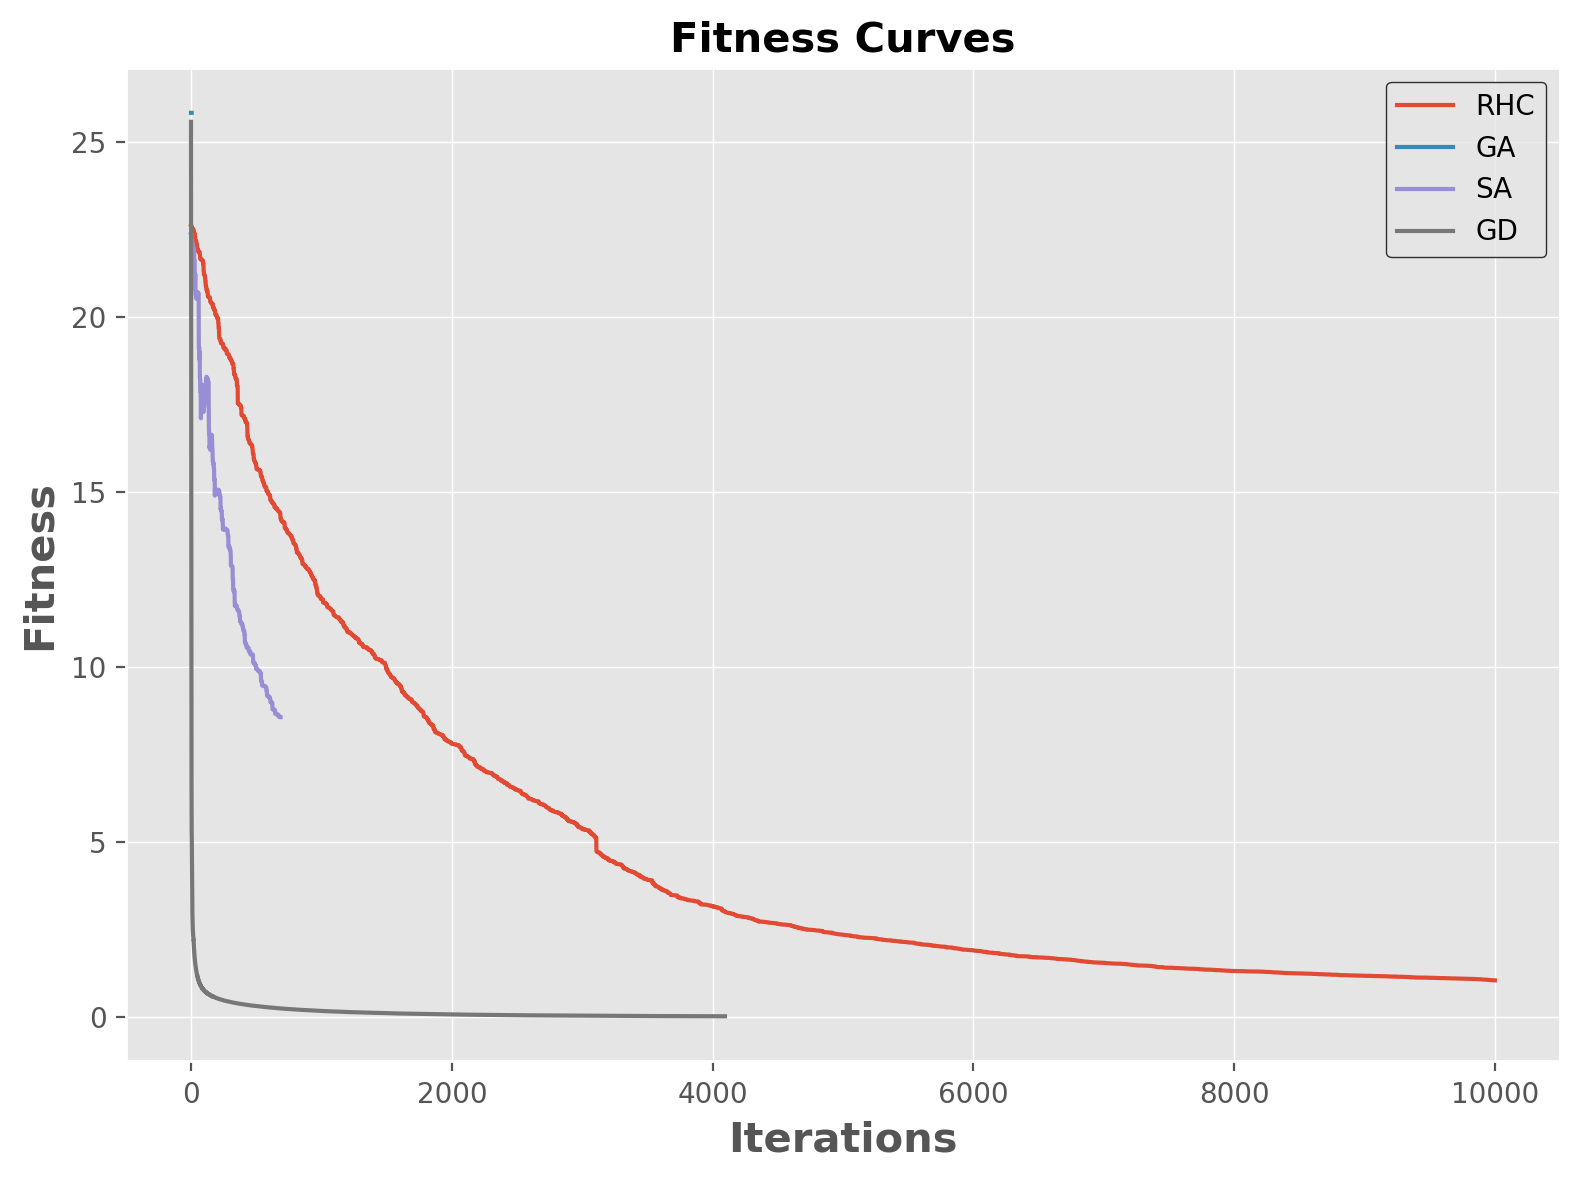

In [11]:
utl.plot_func(temp_df)

<AxesSubplot:>

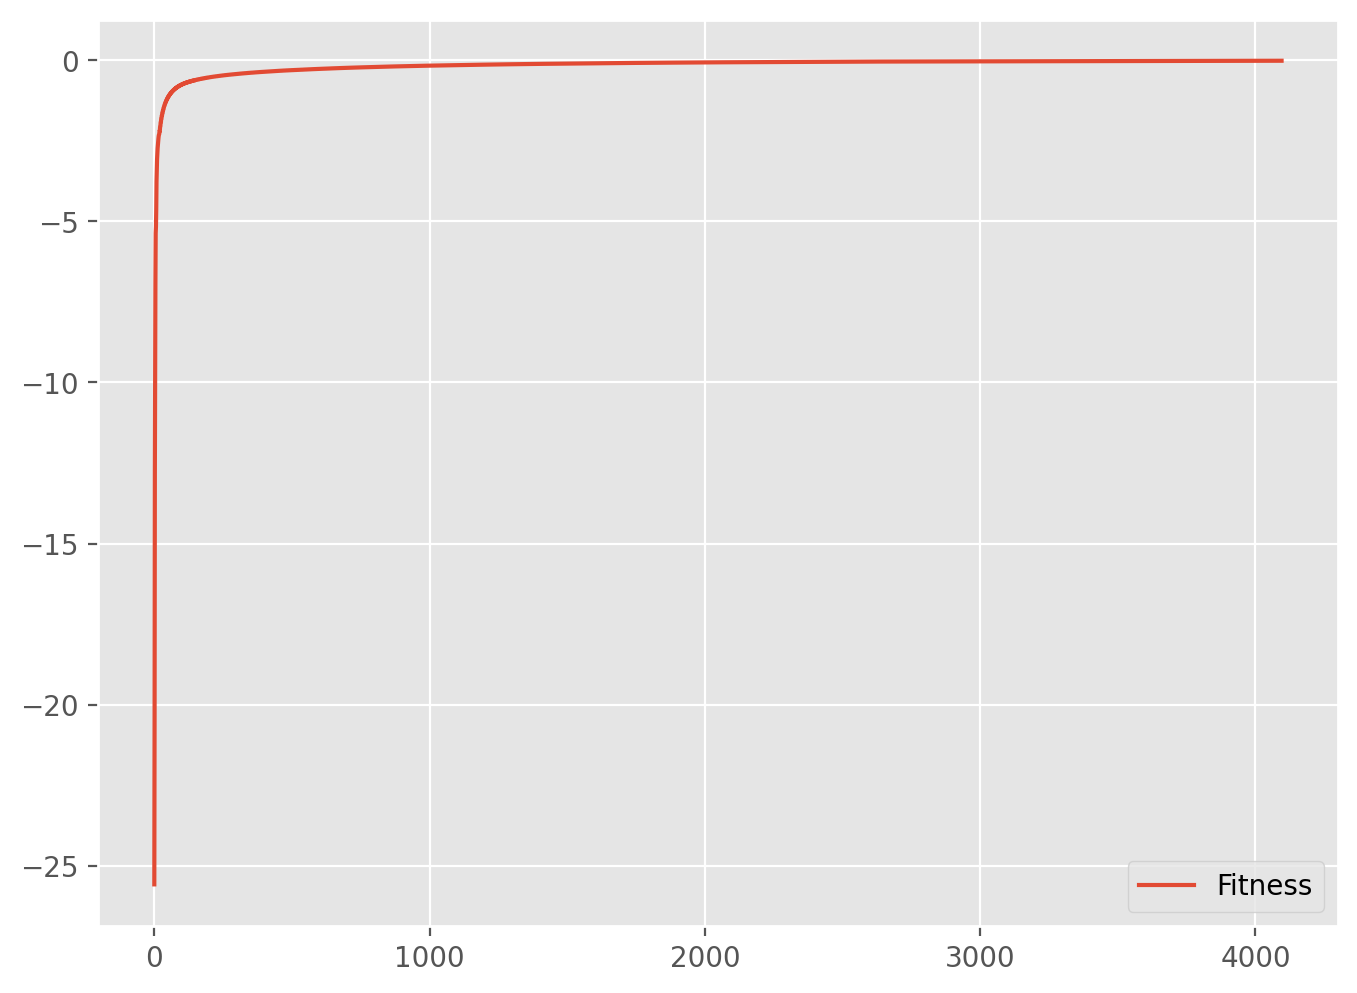

In [12]:
gd_object["DataFrame"].plot()